<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Numerical methods: 4. Interpolation
## Parameter curves
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we learn how to fit a smooth line to a set of discrete points.

We first import the `python` libraries needed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

## Data points
Next, we define the data point sin the $x$-$y$ domain:

In [2]:
# define points in 2D space
xdata = np.array([-1.0,-0.25, 1.0, 0.0, 1.0])
ydata = np.array([ 0.0, 1.0, 0.5, 0.0,-1.0])

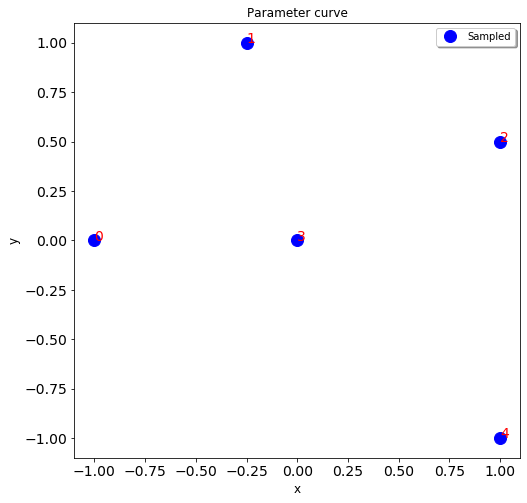

In [3]:
plt.figure(figsize=(8.0, 8.0))
plt.rc("font",size=14)
plt.title('Parameter curve',size=12)
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.plot(xdata,ydata,color='blue',marker='o',markersize=12,linewidth=0,label='Sampled')
for i in range(len(xdata)):
    plt.text(xdata[i],ydata[i],str(i),color='r')
plt.legend(loc='upper right',shadow=True,fontsize=10)
plt.show()

We recall the definition of the **Lagrange basis functions** and the
**Lagrange interpolation polynomial**.

In [4]:
def pol_lagrange_basis(xint,xdata,n,k):
    '''
    #----------------------------------------------------------------------
    # calculate Lagrange basis function L_{n,k}
    # (c) Georg Kaufmann
    #----------------------------------------------------------------------
    '''
    P = 1
    for i in np.arange(0,n+1):
        if (i!=k):
            P = P * (xint-xdata[i]) / (xdata[k]-xdata[i])
    return P

In [5]:
def pol_lagrange (xint,xdata,ydata):
    '''
    #----------------------------------------------------------------------
    # given the arrays xdata(0:n) and ydata(0:n) of length n, which tabulate
    # a function (with the xdata's in ascending order), and a coordinate xint
    # calculate the Lagrange interpolation polynomial of order n
    # (c) Georg Kaufmann
    #----------------------------------------------------------------------
    '''
    n = len(xdata)-1
    yint = 0.
    for k in np.arange(0,n+1):
        yint = yint + ydata[k] * pol_lagrange_basis(xint,xdata,n,k)
    return yint

Next, we parameterise a function 

In [6]:
#-----------------------------------------------------------------------
# create points along trace (from [0,1])
#-----------------------------------------------------------------------
n = len(xdata)
tdata = np.zeros([n])
#print(type(tdata),tdata.ndim,tdata.shape)
for i in np.arange(0,n):
    tdata[i] = float(i) / float(n-1)

In [7]:
print (xdata,ydata,tdata)

[-1.   -0.25  1.    0.    1.  ] [ 0.   1.   0.5  0.  -1. ] [0.   0.25 0.5  0.75 1.  ]


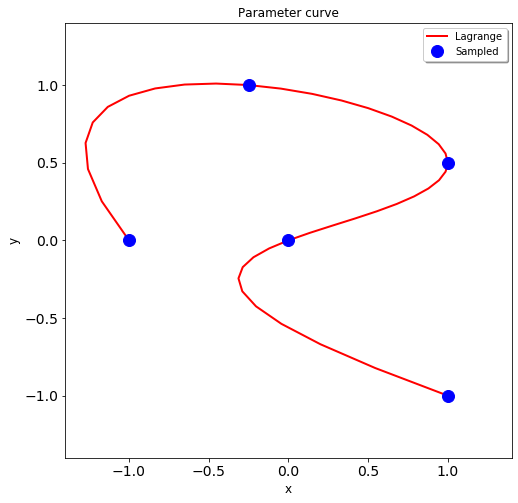

In [8]:
def plot_curve(x1=-0.25,y1=1.,x3=0.,y3=0.):
    xdata[1]=x1
    ydata[1]=y1
    xdata[3]=x3
    ydata[3]=y3
    #-----------------------------------------------------------------------
    # set interpolation points and interpolate
    #-----------------------------------------------------------------------
    nint = 41
    xint = np.zeros([nint])
    yint = np.zeros([nint])
    tint = np.zeros([nint])
    for i in np.arange(0,nint):
        tint[i] = float(i) / float(nint-1)
        xint[i]  = pol_lagrange(tint[i],tdata,xdata)
        yint[i]  = pol_lagrange(tint[i],tdata,ydata)
    plt.figure(figsize=(8.0, 8.0))
    plt.rc("font",size=14)
    plt.title('Parameter curve',size=12)
    plt.xlabel('x',size=12)
    plt.ylabel('y',size=12)
    plt.xlim([-1.4,1.4])
    plt.ylim([-1.4,1.4])
    plt.plot(xint,yint,color='red',linestyle='solid',linewidth=2,label='Lagrange')
    plt.plot(xdata,ydata,color='blue',marker='o',markersize=12,linewidth=0,label='Sampled')
    plt.legend(loc='upper right',shadow=True,fontsize=10)
    plt.show()

plot_curve()

In [9]:
# call interactive module
w = dict(
x1=widgets.FloatSlider(min=-1.,max=1.,step=0.1,value=-0.25,description='xdata[1]'),
y1=widgets.FloatSlider(min=-1.,max=1.,step=0.1,value=1.,description='ydata[1]'),
x3=widgets.FloatSlider(min=-0.8,max=0.8,step=0.1,value=0.0,description='xdata[3]'),
y3=widgets.FloatSlider(min=-1.,max=0.5,step=0.1,value=0.0,description='ydata[3]')
)

output = widgets.interactive_output(plot_curve, w)
box = widgets.VBox([widgets.HBox([*w.values()]), output])
display(box)

[next >](lib04_interpolate.ipynb)